In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Classification with TItanic dataset
- Data from Kaggle's Titanic competition: [data dictionary](https://www.kaggle.com/c/titanic/data)
- **Goal**: Predict survival based on passenger characteristics
- `titanic.csv` is already in our repo, so there is no need to download the data from the Kaggle website

Variable description
- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [54]:
data_file = 'data/titanic.csv'
titanic = pd.read_csv(data_file, index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Embarked 변수 처리

Embarked 변수를 더미변수로 처리합니다. pandas의 get_dummies함수를 이용합니다.

In [56]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [57]:
embark_dum = pd.get_dummies(titanic['Embarked'], prefix='port')
embark_dum.sample(n = 10)

,port_C,port_Q,port_S
PassengerId,,,
380,0,0,1
77,0,0,1
647,0,0,1
136,1,0,0
562,0,0,1
469,0,1,0
490,0,0,1
93,0,0,1
193,0,0,1


In [58]:
embark_dum.drop(embark_dum.columns[2], axis=1, inplace=True)
embark_dum.sample(n = 10)

,port_C,port_Q
PassengerId,,
560,0,0
86,0,0
318,0,0
460,0,1
683,0,0
681,0,1
281,0,1
57,0,0
51,0,0


In [59]:
titanic = pd.concat([titanic, embark_dum], axis=1)
titanic.drop(['Embarked'], axis=1, inplace=True)

### Age 변수 처리
- 결측치 (missing value) 존재

In [60]:
age_group = []
for i in range (0, len(titanic)):
    age = titanic.iloc[i]['Age']
    age = 'child' if age < 20 else 'adult' if age >= 20 else 'unknown'
    age_group.append(age)

In [61]:
titanic['Age_modified'] = age_group

In [62]:
age_dum = pd.get_dummies(titanic['Age_modified'], prefix = 'Age')
age_dum.drop(age_dum.columns[2], axis=1, inplace=True)
age_dum.sample(n = 10)

,Age_adult,Age_child
PassengerId,,
351,1,0
195,1,0
253,1,0
579,0,0
283,0,1
437,1,0
747,0,1
855,1,0
763,1,0


In [63]:
titanic = pd.concat([titanic, age_dum], axis=1)
titanic.drop(['Age', 'Age_modified'], axis=1, inplace=True)

### Sex 처리

In [64]:
titanic['Sex'] = titanic['Sex'].map({'female':1, 'male':0})

In [65]:
titanic.head(10)

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,port_C,port_Q,Age_adult,Age_child
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,NaN,0,0,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,71.2833,C85,1,0,1,0
3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,53.1000,C123,0,0,1,0
5,0,3,"Allen, Mr. William Henry",0,0,0,373450,8.0500,NaN,0,0,1,0
6,0,3,"Moran, Mr. James",0,0,0,330877,8.4583,NaN,0,1,0,0
7,0,1,"McCarthy, Mr. Timothy J",0,0,0,17463,51.8625,E46,0,0,1,0
8,0,3,"Palsson, Master. Gosta Leonard",0,3,1,349909,21.0750,NaN,0,0,0,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,0,2,347742,11.1333,NaN,0,0,1,0


우선 통계학적인 방법으로 계산해봅니다.


In [67]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
formula = 'Survived ~ Pclass+Sex+SibSp+Parch+Fare+port_C+port_Q+Age_adult+Age_child'
# Fit the logistic regression model
model = smf.logit(formula, data=titanic).fit()

# Print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.447577
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            9
Date:                Thu, 16 Mar 2023   Pseudo R-squ.:                  0.3279
Time:                        07:35:58   Log-Likelihood:                -398.79
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.934e-78
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2587      0.409      0.632      0.527      -0.543       1.060
Pclass        -0.9116      0.

Odd ratio를 계산해봅니다.

In [68]:
# Calculate odds ratios
odds_ratios = np.exp(model.params)

# Print odds ratios
print("Odds Ratios:")
print(odds_ratios)

Odds Ratios:
Intercept     1.295181
Pclass        0.401883
Sex          15.402575
SibSp         0.733820
Parch         0.877658
Fare          1.002528
port_C        1.576883
port_Q        1.515300
Age_adult     1.111197
Age_child     2.747993
dtype: float64


# Model 학습

sklearn에 있는 LogisticRegression 을 불러와서 모형을 생성합니다.\
metrics는 여러 평가지표를 의미합니다.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [70]:
feature_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'port_C', 'port_Q', 'Age_adult', 'Age_child']
X = titanic[feature_cols]
y = titanic.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [71]:
logreg = LogisticRegression(C=1000)
logreg.fit(X_train, y_train)
print(list(zip(feature_cols, logreg.coef_[0])))

[('Pclass', -0.8818244406123706), ('Sex', 2.6980480541085132), ('SibSp', -0.3439182848734963), ('Parch', -0.0726888697998788), ('Fare', 0.0026116057673728752), ('port_C', 0.2994803047385198), ('port_Q', 0.48965390562499567), ('Age_adult', 0.21868549540287197), ('Age_child', 1.0756814070245226)]


/Users/taeyeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
print(logreg.coef_)
print(logreg.coef_[0])

[[-8.81824441e-01  2.69804805e+00 -3.43918285e-01 -7.26888698e-02
   2.61160577e-03  2.99480305e-01  4.89653906e-01  2.18685495e-01
   1.07568141e+00]]
[-8.81824441e-01  2.69804805e+00 -3.43918285e-01 -7.26888698e-02
  2.61160577e-03  2.99480305e-01  4.89653906e-01  2.18685495e-01
  1.07568141e+00]


In [73]:
# class predictions (not predicted probabilities)
y_pred_class = logreg.predict(X_test)

In [74]:
y_pred_class

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [75]:
y_pred_prob = logreg.predict_proba(X_test)

In [76]:
y_pred_prob

array([[0.2884089 , 0.7115911 ],
       [0.89703574, 0.10296426],
       [0.53215237, 0.46784763],
       [0.60186709, 0.39813291],
       [0.90645322, 0.09354678],
       [0.78829227, 0.21170773],
       [0.2047907 , 0.7952093 ],
       [0.26378079, 0.73621921],
       [0.17433712, 0.82566288],
       [0.45067501, 0.54932499],
       [0.36651075, 0.63348925],
       [0.38834356, 0.61165644],
       [0.11661466, 0.88338534],
       [0.90407667, 0.09592333],
       [0.0709772 , 0.9290228 ],
       [0.29319736, 0.70680264],
       [0.05317916, 0.94682084],
       [0.64310003, 0.35689997],
       [0.53199381, 0.46800619],
       [0.84179416, 0.15820584],
       [0.55306929, 0.44693071],
       [0.10951967, 0.89048033],
       [0.7939028 , 0.2060972 ],
       [0.90804859, 0.09195141],
       [0.9400322 , 0.0599678 ],
       [0.9283636 , 0.0716364 ],
       [0.90411159, 0.09588841],
       [0.03576828, 0.96423172],
       [0.80007638, 0.19992362],
       [0.87795227, 0.12204773],
       [0.

In [77]:
# calculate classification accuracy
print(metrics.accuracy_score(y_test, y_pred_class))

0.8161434977578476


# 5. How to evaluate the classification model

## Using confusion matrix

In [78]:
# print confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[124  15]
 [ 26  58]]


In [79]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [80]:
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 58
True Negatives: 124
False Positives: 15
False Negatives: 26


In [81]:
# calculate the sensitivity
print('Sensitivity:', TP / (TP + FN))

Sensitivity: 0.6904761904761905


In [82]:
# calculate the specificity
print('Specificity:', TN / (TN + FP))

Specificity: 0.8920863309352518


In [83]:
print(metrics.f1_score(y_test, y_pred_class))

0.7388535031847133


In [84]:
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       139
           1       0.79      0.69      0.74        84

    accuracy                           0.82       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.82      0.81       223



### How about using other threshold?
- If y_pred_prob > 0.3, than y_pred_class = 1

In [85]:
test = logreg.predict_proba(X_test)
print(test)

[[0.2884089  0.7115911 ]
 [0.89703574 0.10296426]
 [0.53215237 0.46784763]
 [0.60186709 0.39813291]
 [0.90645322 0.09354678]
 [0.78829227 0.21170773]
 [0.2047907  0.7952093 ]
 [0.26378079 0.73621921]
 [0.17433712 0.82566288]
 [0.45067501 0.54932499]
 [0.36651075 0.63348925]
 [0.38834356 0.61165644]
 [0.11661466 0.88338534]
 [0.90407667 0.09592333]
 [0.0709772  0.9290228 ]
 [0.29319736 0.70680264]
 [0.05317916 0.94682084]
 [0.64310003 0.35689997]
 [0.53199381 0.46800619]
 [0.84179416 0.15820584]
 [0.55306929 0.44693071]
 [0.10951967 0.89048033]
 [0.7939028  0.2060972 ]
 [0.90804859 0.09195141]
 [0.9400322  0.0599678 ]
 [0.9283636  0.0716364 ]
 [0.90411159 0.09588841]
 [0.03576828 0.96423172]
 [0.80007638 0.19992362]
 [0.87795227 0.12204773]
 [0.45353774 0.54646226]
 [0.26879801 0.73120199]
 [0.7939028  0.2060972 ]
 [0.89252955 0.10747045]
 [0.69976913 0.30023087]
 [0.74247008 0.25752992]
 [0.90416723 0.09583277]
 [0.9041446  0.0958554 ]
 [0.20596277 0.79403723]
 [0.53003865 0.46996135]


In [86]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

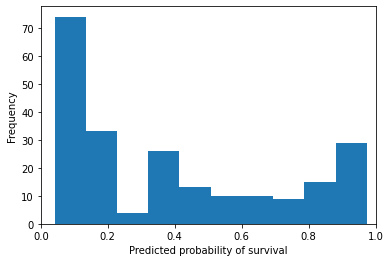

In [87]:
# histogram of predicted probabilities
plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')

In [88]:
# increase sensitivity by lowering the threshold for predicting survival
y_pred_class_new = np.where(y_pred_prob >= 0.3, 1, 0)

In [89]:
y_pred_class_new

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0])

In [90]:
# old confusion matrix
print(confusion)

[[124  15]
 [ 26  58]]


In [91]:
confusion_new = metrics.confusion_matrix(y_test, y_pred_class_new)
print(confusion_new)

[[97 42]
 [12 72]]


In [92]:
TP = confusion_new[1][1]
TN = confusion_new[0][0]
FP = confusion_new[0][1]
FN = confusion_new[1][0]

In [93]:
# new sensitivity (higher than before)
print('Sensitivity:', TP / float(TP + FN))

Sensitivity: 0.8571428571428571


In [94]:
# new specificity (lower than before)
print('Specificity:', TN / float(TN + FP))

Specificity: 0.697841726618705


In [95]:
print(metrics.classification_report(y_test, y_pred_class_new))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78       139
           1       0.63      0.86      0.73        84

    accuracy                           0.76       223
   macro avg       0.76      0.78      0.75       223
weighted avg       0.79      0.76      0.76       223



## ROC, auroc

### Drawing ROC curve and calculate AUC

In [96]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [97]:
classifier = LogisticRegression()
y_prob = classifier.fit(X_train, y_train).predict_proba(X_test)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

/Users/taeyeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/taeyeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [98]:
print(y_prob[0:10,:])

[[0.30801467 0.69198533]
 [0.88523088 0.11476912]
 [0.53966239 0.46033761]
 [0.60197198 0.39802802]
 [0.89982836 0.10017164]
 [0.78107587 0.21892413]
 [0.21971362 0.78028638]
 [0.27737926 0.72262074]
 [0.19556129 0.80443871]
 [0.44289601 0.55710399]]


In [99]:
print(y_score[0:10])

[ 0.80941736 -2.04292601 -0.15898359 -0.41368851 -2.19531887 -1.27194706
  1.26733603  0.95749879  1.41427091  0.22941692]


In [100]:
# fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8564148681055156


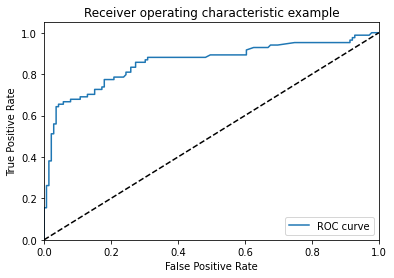

In [101]:
plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [102]:
# ROC curve를 그리지 않고 바로 AUC를 계산해주는 함수
roc_auc_score(y_test, y_score)

0.8564148681055156